In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from src.utils import switch_quotes

# Read data

In [342]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c","#d62728", "#9467bd"]
data = pd.read_csv("tuning_r1.csv").drop_duplicates()
print(len(data))


data['params'] = data['params'].apply(lambda x: json.loads(switch_quotes(x)))
params = data['params'][0].keys()
datasets = sorted(data['Dataset'].unique())
data = pd.concat([data.drop(['params'], axis=1), data['params'].apply(pd.Series)], axis=1)

864


# Models

In [343]:
rank_by = 'MAPE test'

param_titles = {'depth': 'Depth', 'min_epochs': 'Minimum number of epochs before early stopping', 'learning_rate': 'Learning rate AdamW', 
                'dropout': 'Dropout', 'l2_penalty': 'L2 penalty', 'init_stride': 'Initial CNN'}

order_by = list(param_titles.keys())

results = data[['Dataset'] + order_by + [rank_by]]
models = results[order_by].sort_values(by=order_by).drop_duplicates().reset_index()
models['index'] = [f'Model {i}' for i in range(len(models))]
to_cd = results.merge(models, on=order_by).rename(columns={'index': 'Model'}).to_csv("intermediate_tuning_results.csv", index=False)
models = models.rename(columns={'index': 'Model'}).rename(columns=param_titles)
models['Initial CNN'] = models['Initial CNN'].apply(lambda x: 'With' if x==2 else 'Without')
num_models = len(models)

models.to_csv("model_overview.csv", index=False)


# Parameter overview

In [344]:
param_overview = {}
for i, param in enumerate(models.columns[1:]):
    param_overview[param] = str(models[param].unique())
param_overview = pd.DataFrame(param_overview, index=[0]).T.reset_index().rename(columns={0: 'Values', 'index': 'Parameter'})
param_overview.to_csv("tables/tuning_param_overview.csv", index=False)
param_overview


,Parameter,Values
0,Depth,[6 9]
1,Minimum number of epochs before early stopping,[ 50 800]
2,Learning rate AdamW,[1.e-05 1.e-04 1.e-03]
3,Dropout,[0. 0.3]
4,L2 penalty,[0. 0.001]
5,Initial CNN,['Without' 'With']


In [345]:
models
models.to_csv("model_overview.csv", index=False)


In [346]:
models

,Model,Depth,Minimum number of epochs before early stopping,Learning rate AdamW,Dropout,L2 penalty,Initial CNN
0,Model 0,6,50,0.00001,0.0,0.000,Without
1,Model 1,6,50,0.00001,0.0,0.000,With
2,Model 2,6,50,0.00001,0.0,0.001,Without
3,Model 3,6,50,0.00001,0.0,0.001,With
4,Model 4,6,50,0.00001,0.3,0.000,Without
...,...,...,...,...,...,...,...
67,Model 67,9,800,0.00100,0.0,0.001,With
68,Model 68,9,800,0.00100,0.3,0.000,Without
69,Model 69,9,800,0.00100,0.3,0.000,With
70,Model 70,9,800,0.00100,0.3,0.001,Without


# Ranking

In [347]:
ranked = []
to_show = []
for grp_idx, grp in results.groupby('Dataset'):
    # sort
    grp = grp.sort_values(rank_by, ascending=rank_by!='R2 test')
    # add rank
    grp['Rank'] = range(1, len(grp) + 1)

    ranked.append(grp)
    # keep first three
    to_show.append(grp.iloc[:3])

ranked = pd.concat(ranked)
to_show = pd.concat(to_show)

to_show.groupby(['Dataset', 'Rank']).first() # because of ranking, there is just one line per group --> can do first


depth  min_epochs  learning_rate  dropout  l2_penalty  \
Dataset      Rank                                                          
DS_-10_10_10 1         6          50        0.00010      0.3       0.001   
             2         9         800        0.00010      0.0       0.000   
             3         6         800        0.00010      0.0       0.001   
DS_-10_80_10 1         9         800        0.00100      0.3       0.001   
             2         6         800        0.00001      0.0       0.001   
             3         6         800        0.00010      0.0       0.000   
DS_0_10_10   1         6         800        0.00100      0.0       0.000   
             2         9         800        0.00001      0.0       0.000   
             3         6         800        0.00001      0.0       0.001   
DS_0_80_10   1         9         800        0.00100      0.3       0.000   
             2         9         800        0.00001      0.0       0.001   
             3         9         800        0.00010      0.0       0.001   
DS_10_10_10  1         6         800        0.00001      0.0       0.001   
             2         6          50        0.00001      0.3       0.000   
             3         6          50        0.00010      0.3       0.000   
DS_10_80_10  1         6          50        0.00010      0.3       0.001   
             2         9         800        0.00100      0.3       0.000   
             3         9         800        0.00100      0.3       0.001   
DS_20_10_10  1         6          50        0.00010      0.0       0.001   
             2         6          50        0.00010      0.0       0.000   
             3         6         800        0.00010      0.0       0.001   
DS_20_80_10  1         9         800        0.00100      0.0       0.001   
             2         6         800        0.00100      0.0       0.001   
             3         9         800        0.00100      0.0       0.000   
DS_50_10_10  1         6         800        0.00100      0.0       0.001   
             2         6         800        0.00010      0.0       0.001   
             3         6         800        0.00100      0.0       0.000   
DS_50_80_10  1         6          50        0.00100      0.0       0.001   
             2         6         800        0.00100      0.0       0.000   
             3         6          50        0.00100      0.0       0.000   
DS_80_10_10  1         9         800        0.00100      0.0       0.000   
             2         9         800        0.00010      0.0       0.000   
             3         9         800        0.00010      0.0       0.001   
DS_80_80_10  1         6         800        0.00100      0.0       0.000   
             2         6         800        0.00010      0.0       0.001   
             3         6         800        0.00010      0.0       0.000   

                   init_stride  MAPE test  
Dataset      Rank                          
DS_-10_10_10 1              -1   0.187687  
             2               2   0.188182  
             3               2   0.188277  
DS_-10_80_10 1              -1   0.187669  
             2              -1   0.189047  
             3              -1   0.191688  
DS_0_10_10   1               2   0.191602  
             2               2   0.192755  
             3              -1   0.193540  
DS_0_80_10   1              -1   0.187233  
             2               2   0.187634  
             3              -1   0.188965  
DS_10_10_10  1              -1   0.188016  
             2              -1   0.189119  
             3              -1   0.189428  
DS_10_80_10  1              -1   0.181563  
             2              -1   0.186353  
             3              -1   0.186527  
DS_20_10_10  1               2   0.177773  
             2               2   0.177952  
             3               2   0.179435  
DS_20_80_10  1               2   0.170152  
             2               2   0.172207  
             3               2

In [348]:
ranked.pivot_table(index='Dataset', columns='Rank', values=rank_by)

Rank,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
Dataset,,,,,,,,,,,,,,,,,,,,,
DS_-10_10_10,0.187687,0.188182,0.188277,0.188464,0.188721,0.189853,0.190455,0.193086,0.196015,0.196707,...,0.503611,0.525404,0.544708,0.548689,0.632462,0.692464,0.734388,0.745224,0.805736,0.946118
DS_-10_80_10,0.187669,0.189047,0.191688,0.192422,0.192467,0.193877,0.194031,0.194414,0.194703,0.195066,...,0.382213,0.431248,0.465983,0.506880,0.571227,0.636462,0.640599,0.688734,0.697905,0.733051
DS_0_10_10,0.191602,0.192755,0.193540,0.193600,0.194175,0.194299,0.194742,0.196206,0.196627,0.196773,...,0.439672,0.473624,0.534320,0.541253,0.553742,0.625903,0.662780,0.726326,0.787792,0.796985
DS_0_80_10,0.187233,0.187634,0.188965,0.189260,0.190418,0.191611,0.192069,0.192235,0.193776,0.195593,...,0.586985,0.595878,0.603427,0.667267,0.682833,0.715434,0.723136,0.731063,1.062602,1.360412
DS_10_10_10,0.188016,0.189119,0.189428,0.189537,0.190166,0.190524,0.192411,0.193159,0.193418,0.193726,...,0.356651,0.365860,0.382711,0.408277,0.426387,0.434830,0.493057,0.503436,0.568351,0.573175
DS_10_80_10,0.181563,0.186353,0.186527,0.186738,0.186833,0.188961,0.190128,0.191337,0.192253,0.192345,...,0.527460,0.557908,0.561465,0.564238,0.639949,0.687757,0.713190,0.714297,0.733475,0.755431
DS_20_10_10,0.177773,0.177952,0.179435,0.180406,0.182673,0.183065,0.183077,0.183720,0.184055,0.185787,...,0.255010,0.267970,0.288112,0.302469,0.308467,0.338219,0.368401,0.380156,0.436077,0.437704
DS_20_80_10,0.170152,0.172207,0.172846,0.173201,0.174345,0.175689,0.179942,0.181295,0.181563,0.183266,...,0.446299,0.454816,0.586268,0.632230,0.655090,0.685909,0.727296,0.774832,0.850118,1.331696
DS_50_10_10,0.140970,0.143620,0.145662,0.146350,0.147891,0.149819,0.150416,0.151295,0.154442,0.155281,...,0.378857,0.391438,0.391553,0.411414,0.429168,0.456837,0.473138,0.744226,0.835317,0.944704


In [349]:
# the whole ranking

ranked.groupby(['Dataset', 'Rank']).first()

depth  min_epochs  learning_rate  dropout  l2_penalty  \
Dataset      Rank                                                          
DS_-10_10_10 1         6          50        0.00010      0.3       0.001   
             2         9         800        0.00010      0.0       0.000   
             3         6         800        0.00010      0.0       0.001   
             4         6         800        0.00001      0.0       0.001   
             5         6          50        0.00010      0.3       0.000   
...                  ...         ...            ...      ...         ...   
DS_80_80_10  68        6         800        0.00100      0.3       0.001   
             69        6          50        0.00001      0.0       0.000   
             70        6          50        0.00100      0.3       0.000   
             71        6          50        0.00100      0.0       0.000   
             72        6          50        0.00100      0.0       0.001   

                   init_stride  MAPE test  
Dataset      Rank                          
DS_-10_10_10 1              -1   0.187687  
             2               2   0.188182  
             3               2   0.188277  
             4              -1   0.188464  
             5              -1   0.188721  
...                        ...        ...  
DS_80_80_10  68             -1   0.637787  
             69              2   0.649978  
             70              2   0.777106  
             71              2   2.230341  
             72              2   2.269714  

[864 rows x 7 columns]

# Performance Overview

/tmp/ipykernel_12267/1511222626.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('magma_r', num_models)    # 11 discrete colors


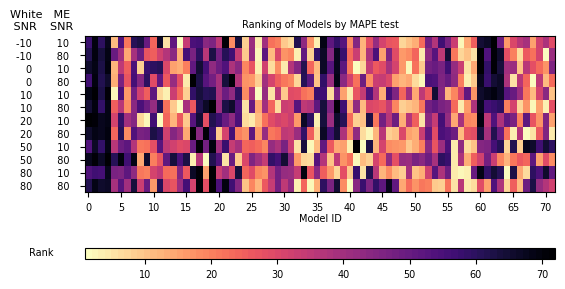

,White SNR,ME SNR,Mean,Std,Min,Max,% below 72
0,-10,10,36.5,20.93,1.0,72.0,0.99
1,-10,80,36.5,20.93,1.0,72.0,0.99
2,0,10,36.5,20.93,1.0,72.0,0.99
3,0,80,36.5,20.93,1.0,72.0,0.99
4,10,10,36.5,20.93,1.0,72.0,0.99
5,10,80,36.5,20.93,1.0,72.0,0.99
6,20,10,36.5,20.93,1.0,72.0,0.99
7,20,80,36.5,20.93,1.0,72.0,0.99
8,50,10,36.5,20.93,1.0,72.0,0.99
9,50,80,36.5,20.93,1.0,72.0,0.99


In [350]:
performance_data = {}

#color_by = 'Rank' # either "Rank" or rank_by
color_by = 'Rank'

for idx, grp in ranked.groupby(['Dataset']):
    grp_sorted = grp.sort_values(by=order_by) 
    performance_data[idx[0]] = grp_sorted[color_by].values

plt.figure(figsize=(10, 5))
performance_data = pd.DataFrame(performance_data) # model id x dataset name
if color_by == 'Rank':
    cmap = plt.cm.get_cmap('magma_r', num_models)    # 11 discrete colors
elif color_by == 'R2 test':
    cmap = plt.cm.get_cmap('magma')
else:
    cmap = plt.cm.get_cmap('magma_r')
limits = {'Rank': num_models, 'MAPE test': 1, 'RMSE test': 8.37, 'R2 test': 0}
limit = limits[color_by]
if color_by != 'R2 test':
    im = plt.imshow(performance_data.T, cmap=cmap, aspect=2, vmax=limit)
else:
    im = plt.imshow(performance_data.T, cmap=cmap, aspect=2, vmin=limit)

cbar = plt.colorbar(orientation='horizontal', aspect=40)
cbar.set_label(loc='left', label=color_by)
cbar.ax.xaxis.set_label_coords(-0.12, 1)

if color_by != 'R2 test':
    cbar.ax.invert_yaxis()

plt.title(f'Ranking of Models by {rank_by}')
plt.text(-12, -1, f'White \n SNR', fontsize=8)
plt.text(-7, -1, f'   ME\n  SNR', fontsize=8)
plt.yticks(range(len(performance_data.columns)), [f"{x.split('_')[1]}        {x.split('_')[2]}  " for x in performance_data.columns])
plt.xticks(np.arange(0, num_models, 5), np.arange(0, num_models, 5))
plt.xlabel('Model ID')
plt.tight_layout()
plt.gcf().set_size_inches(5.5, 4)
if color_by == 'Rank':
    plt.savefig(f'figures/tune_ranking_{rank_by.replace(" ", "_")}.pdf', bbox_inches='tight')
plt.show()

performance_data = pd.concat((performance_data, 
                              grp_sorted.reset_index()[order_by]), 
                              axis=1)

stats = performance_data[datasets].describe().loc[['mean', 'std', 'min', 'max']]
def f(x, metric): 
    if metric == 'R2 test':
        return (x > limits[metric]).mean()
    return (x < limits[metric]).mean()

stats.loc[f'% {"below" if color_by!="R2 test" else "above"} {limit}'] = performance_data[datasets].apply(lambda x: f(x, color_by))
stats = stats.T.reset_index().rename(columns={'index': 'Dataset'})
stats['White SNR'] = stats['Dataset'].apply(lambda x: x.split('_')[1])
stats['ME SNR'] = stats['Dataset'].apply(lambda x: x.split('_')[2])
stats.drop('Dataset', axis=1, inplace=True)
stats = stats.round(2)
# reorder so that the last two columns is first
stats = stats[['White SNR', 'ME SNR', 'mean', 'std', 'min', 'max', f'% {"below" if color_by!="R2 test" else "above"} {limit}']]
stats = stats.rename(columns={'mean': 'Mean', 'std': 'Std', 'min': 'Min', 'max': 'Max'})
if color_by != 'Rank':
    stats.to_csv(f"tables/statistics_{color_by}_.csv", index=False)
stats

# Average Ranking

In [351]:
# average rank for model per dataset

average_ranking = ranked.groupby(order_by).agg({'Rank': 'mean'}).reset_index().sort_values(by='Rank')
average_ranking


,depth,min_epochs,learning_rate,dropout,l2_penalty,init_stride,Rank
26,6,800,0.00001,0.0,0.001,-1,12.750000
58,9,800,0.00010,0.0,0.001,-1,14.250000
24,6,800,0.00001,0.0,0.000,-1,15.583333
40,6,800,0.00100,0.0,0.000,-1,15.750000
48,9,800,0.00001,0.0,0.000,-1,17.166667
...,...,...,...,...,...,...,...
62,9,800,0.00010,0.3,0.001,-1,60.916667
0,6,50,0.00001,0.0,0.000,-1,62.750000
2,6,50,0.00001,0.0,0.001,-1,62.916667
1,6,50,0.00001,0.0,0.000,2,68.750000


In [352]:
print("Top 3 models:", average_ranking.iloc[:3].index.values) # by RMSE = 40, 66, 58, by MAPE = 26, 58, 24


Top 3 models: [26 58 24]


In [353]:
# # 0.05 = num_false discoveries / num_discoveries
# num_discoveries = np.sum(np.array(adjusted_p_values) < alpha) // 2
# num_false_discoveries = alpha * num_discoveries
# print(f"With FDR rate of {alpha}, we expect {round(num_false_discoveries, 2)} false discoveries in {int(num_discoveries)} discoveries")

In [354]:
best_models = average_ranking.iloc[0:3]
best_models.merge(results, on=order_by, how='right')
best_models['Rank'] = best_models['Rank'].round(2)
best_models['Ranked by'] = rank_by.split(' ')[0]
best_models.index.rename('Model')
best_models.to_csv(f"tables/top3_models_{rank_by}.csv")
best_models

/tmp/ipykernel_12267/3799685695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_models['Rank'] = best_models['Rank'].round(2)
/tmp/ipykernel_12267/3799685695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_models['Ranked by'] = rank_by.split(' ')[0]


,depth,min_epochs,learning_rate,dropout,l2_penalty,init_stride,Rank,Ranked by
26,6,800,0.00001,0.0,0.001,-1,12.75,MAPE
58,9,800,0.00010,0.0,0.001,-1,14.25,MAPE
24,6,800,0.00001,0.0,0.000,-1,15.58,MAPE


In [355]:
# Original model
results.loc[(results['min_epochs']==800) & (results['learning_rate']==0.001) &\
            (results['dropout']==0) & (results['l2_penalty']==0) & (results['init_stride']==-1) & (results['depth']==6)].sort_values(by='Dataset')

,Dataset,depth,min_epochs,learning_rate,dropout,l2_penalty,init_stride,MAPE test
549,DS_-10_10_10,6,800,0.001,0.0,0.0,-1,0.202252
509,DS_-10_80_10,6,800,0.001,0.0,0.0,-1,0.205921
548,DS_0_10_10,6,800,0.001,0.0,0.0,-1,0.206149
510,DS_0_80_10,6,800,0.001,0.0,0.0,-1,0.223900
554,DS_10_10_10,6,800,0.001,0.0,0.0,-1,0.189537
526,DS_10_80_10,6,800,0.001,0.0,0.0,-1,0.193481
555,DS_20_10_10,6,800,0.001,0.0,0.0,-1,0.198769
525,DS_20_80_10,6,800,0.001,0.0,0.0,-1,0.189706
570,DS_50_10_10,6,800,0.001,0.0,0.0,-1,0.145662
530,DS_50_80_10,6,800,0.001,0.0,0.0,-1,0.122839


In [356]:
results.sort_values(by=rank_by).head(3)

,Dataset,depth,min_epochs,learning_rate,dropout,l2_penalty,init_stride,MAPE test
531,DS_80_80_10,6,800,0.0010,0.0,0.000,-1,0.100783
516,DS_80_80_10,6,800,0.0001,0.0,0.001,-1,0.101466
511,DS_80_80_10,6,800,0.0001,0.0,0.000,-1,0.102047


In [357]:
topByMAPE = pd.read_csv("tables/top3_models_MAPE test.csv").rename(columns={'Unnamed: 0': 'Model'})
topByRMSE = pd.read_csv("tables/top3_models_RMSE test.csv").rename(columns={'Unnamed: 0': 'Model'})

pd.concat([topByMAPE, topByRMSE]).drop(columns= ['Rank', 'Ranked by']) \
    .drop_duplicates().sort_values('Model').to_csv("tables/top3_models.csv", index=False)

pd.concat([topByMAPE, topByRMSE]).drop(columns=order_by).pivot(index='Model', columns='Ranked by', values='Rank')

Ranked by,MAPE,RMSE
Model,,
24,15.58,NaN
26,12.75,NaN
40,NaN,10.25
58,14.25,12.83
66,NaN,11.00


# Pairwise-wilcoxons signed-rank test
1. performed on ranks
2. using the holm-correction when forming groups


In [358]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
#from multipy.fdr import qvalue #broken
# compare models with wilcoxon
alpha = 0.05

# we shouldn't even perform tests on models that are 100% off... in fact we really only care about the top few models
# p_values = []

# for i in range(num_models):
#     for j in range(num_models):
#         #print(f"Comparing model {i} with model {j}")
#         if i == j:
#             p_values.append(0)
#         else:
#             res = wilcoxon(performance_data[datasets].loc[i], 
#                         performance_data[datasets].loc[j], 
#                         method='exact')
#             p_values.append(res.pvalue) # if p low enough there is a difference. if the p is higer than alpha, there is no significant difference
# adjusted_p_values = p_values # no correction
# #adjusted_p_values = multipletests(p_values, alpha=0.1)[1] # we have so many models, that the correction is extremely strict. 
# #adjusted_p_values = qvalue(p_values, threshold=alpha)[1] # fdr set to alpha
# len(adjusted_p_values)

In [381]:
p_values_table = {'Model ID 1': [], 'Model ID 2': [], "p-value (Wilcoxon)": []}
top_models = [40, 58, 66, 26, 24]
for i in top_models:
    for j in top_models:
        if i > j:
            res = wilcoxon(performance_data[datasets].loc[i], 
                        performance_data[datasets].loc[j], 
                        method='exact')
            p_value = res.pvalue
            if p_value < alpha:
                print(f"Model {i} and model {j} are significantly different with p-value {p_value}")
            p_values_table['Model ID 1'].append(i)
            p_values_table['Model ID 2'].append(j)
            p_values_table["p-value (Wilcoxon)"].append(p_value)


adjusted_p_values = multipletests(p_values_table["p-value (Wilcoxon)"], alpha=alpha)[1]
p_values_table['p-value (Holm-corrected)'] = adjusted_p_values

p_values_table = pd.DataFrame(p_values_table).rename(columns={'Model ID 1': 'Model ID', 'Model ID 2': 'Model ID'})
p_values_table[['p-value (Wilcoxon)', 'p-value (Holm-corrected)']] = p_values_table[['p-value (Wilcoxon)', 'p-value (Holm-corrected)']].round(2)
p_values_table.to_csv("tables/wilcoxon_p_values.csv", index=False)
p_values_table

,Model ID,Model ID,p-value (Wilcoxon),p-value (Holm-corrected)
0,40,26,0.47,0.94
1,40,24,0.97,1.00
2,58,40,0.30,0.94
3,58,26,0.97,1.00
4,58,24,0.57,0.94
5,66,40,0.30,0.94
6,66,58,0.09,0.62
7,66,26,0.27,0.94
8,66,24,0.34,0.94
9,26,24,0.38,0.94
